In [156]:
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer 

# vizualization
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

# EDA
Check relations b/w:
* keyword vs target
* location vs target
* target 1 & 0 ratio. (this ratio can be compared for training and test datasets)

% of real disaster tweets: 42.97%


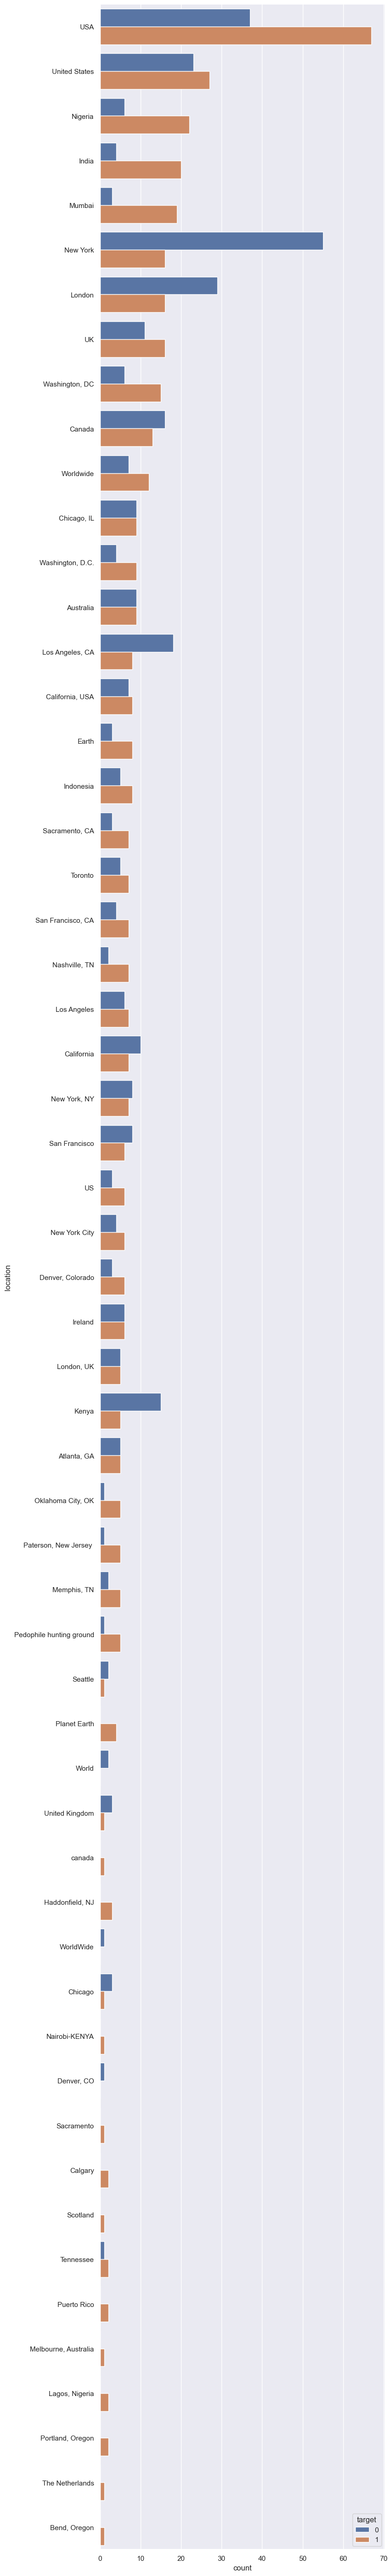

In [220]:
train_data_og = pd.read_csv('./train.csv')
test_data_og = pd.read_csv('./test.csv')

# print(train_data_og.dtypes)
# display(train_data_og.sample(n= 5).style)
# print(train_data_og.isnull().sum(), test_data_og.isnull().sum())

train_data = train_data_og.copy()
print(f"% of real disaster tweets: {np.round(np.sum(train_data['target'])/len(train_data)*100,2)}%")
train_data['target_sum'] = train_data.groupby('keyword')['target'].transform('sum')


plt.figure(figsize=(8, 72), dpi=100)
# sns.countplot(data = train_data, y = train_data.sort_values(by='target_sum', ascending= False)['keyword'],  hue='target')
train_data.drop(columns=['target_sum'], inplace=True)

train_data['target_sum'] = train_data.groupby('location')['target'].transform('sum')
# sns.countplot(data = train_data, y = train_data.sort_values(by='target_sum', ascending= False)['location'].head(800),  hue='target')
train_data.drop(columns=['target_sum'], inplace=True)


## Observation:
* We have almost a balanced set for classification. 42.97% are real and rest are fake disasters.
* Clearly, many keywords have high/low ratio of target count. ie, they can be used to identify target.

# Feature Engineering
* (DONE) perform word tokenization
* (DONE) Remove stop words
* (DONE) Remove https links
* (DONE) Remove punctuations
* (DONE) lowercase strings
* (DONE) apply stemming : reducing words to their stem/root words by removing suffixes
* (X) apply lemmatization: reducing words to its lexeme form or inflected form. words used in the same context.
* vectorization: Bag of Words

Lemmatization is more complex than stemming:
* it needs parts of speech, if its done for individual words otherwise there is no way to understand the context of the word.
* to get this POS we need a lookup dictionary like WordNet (by princeton) and then convert this tag to a tag that nltk will understand.
* no need to do stemming and lemmatization together. choose the one which is good enough. Ofc, lemmatization is more like fine tuning.
* Apply lemmatization before removing stop words.

In [128]:
train_data= train_data.replace(to_replace= {'text':{r'http\S+':'',r'[0-9]+':'',r'[^A-Za-z0-9 ]+':''}}, regex=True)

train_data['text'] = train_data['text'].str.lower().apply(word_tokenize)

stopwords_en = set(stopwords.words('english'))
punctuation_en = set(punctuation)
stopwords_punctuations_en = stopwords_en.union(punctuation_en)

train_data['text'] = train_data['text'].apply(lambda x: [word for word in x if word not in stopwords_punctuations_en and len(word)>2 ])

porter = PorterStemmer()
train_data['text'] = train_data['text'].apply(lambda x : [porter.stem(word) for word in x ] )

display(train_data.sample(n=5).style)

,id,keyword,location,text,target
4827,6874,mass%20murder,Anonymous,"['royalcarribean', 'passeng', 'know', 'mass', 'murder', 'take', 'place', 'faroeisland', 'everi', 'year']",1
6626,9490,terrorism,nan,['truthnewsbbccnnislamtruthgodisisterrorismquranli'],1
7109,10186,violent%20storm,South Africa,"['pov', 'footag', 'captur', 'violent', 'land', 'insid', 'plane', 'storm']",1
1359,1961,burning%20buildings,"Copenhagen, Capital Region of Denmark","['dog', 'render', 'kitten', 'burn', 'build']",1
369,528,army,New York,"['wwi', 'wwii', 'japanes', 'armi', 'navi', 'militari', 'japan', 'leather', 'watch', 'war', 'mido', 'full', 'read', 'ebay']",0


## Observations:
* (DONE) Some tokens contain: "'s", "--", decimal numbers etc.

# Model Selection
* Naive Bayes